In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("G:\\Netzwerk assignments\\Social_Network_Ads.txt")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.groupby('Purchased').count()

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,257,257,257,257
1,143,143,143,143


In [5]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
data.drop('User ID', axis=1, inplace= True)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
from sklearn.preprocessing import LabelEncoder #no LabelEncoder() just LabelEncoder in this line
newcol=LabelEncoder().fit_transform(data['Gender'].values) #for simplification le= LabelEncoder()


In [8]:
data['Gender']= newcol
data.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
5,1,27,58000,0
6,0,27,84000,0
7,0,32,150000,1
8,1,25,33000,0
9,0,35,65000,0


In [9]:
x = data.drop('Purchased',axis=1).values
y = data.iloc[:,-1].values

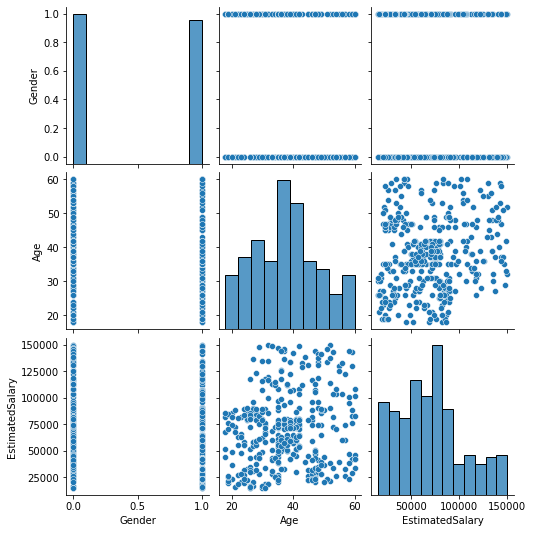

In [10]:
import seaborn as sns
sns.pairplot(data.iloc[:,:-1])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
from sklearn.tree import DecisionTreeClassifier

## CART  Model

In [14]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
model.score(x_test,y_test)

0.8833333333333333

In [16]:
model.score(x_train,y_train)

1.0

## ID3 Model

In [17]:
model1 = DecisionTreeClassifier(criterion='entropy')
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
model1.score(x_test,y_test)

0.9083333333333333

In [19]:
model1.score(x_train,y_train)

1.0

In [20]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [21]:
model2.score(x_test,y_test)

0.925

In [22]:
model2.score(x_train,y_train)

0.9392857142857143

## Checking the best value for max_depth

In [24]:
for i in range(1,20):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    model.fit(x_train,y_train)
    train_acc= model.score(x_train,y_train)
    test_acc= model.score(x_test, y_test)
    print(i, train_acc,  test_acc)
     

1 0.8285714285714286 0.8583333333333333
2 0.9142857142857143 0.9166666666666666
3 0.9142857142857143 0.9166666666666666
4 0.9285714285714286 0.9083333333333333
5 0.9392857142857143 0.925
6 0.9535714285714286 0.8916666666666667
7 0.9642857142857143 0.9
8 0.9714285714285714 0.9
9 0.9785714285714285 0.9166666666666666
10 0.9892857142857143 0.8833333333333333
11 1.0 0.9083333333333333
12 1.0 0.9083333333333333
13 1.0 0.9
14 1.0 0.9
15 1.0 0.9083333333333333
16 1.0 0.9
17 1.0 0.9083333333333333
18 1.0 0.9083333333333333
19 1.0 0.9
